In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('bitcoin_price.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

In [5]:
df.set_index('Date', inplace=True)

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
df.shape

(3392, 6)

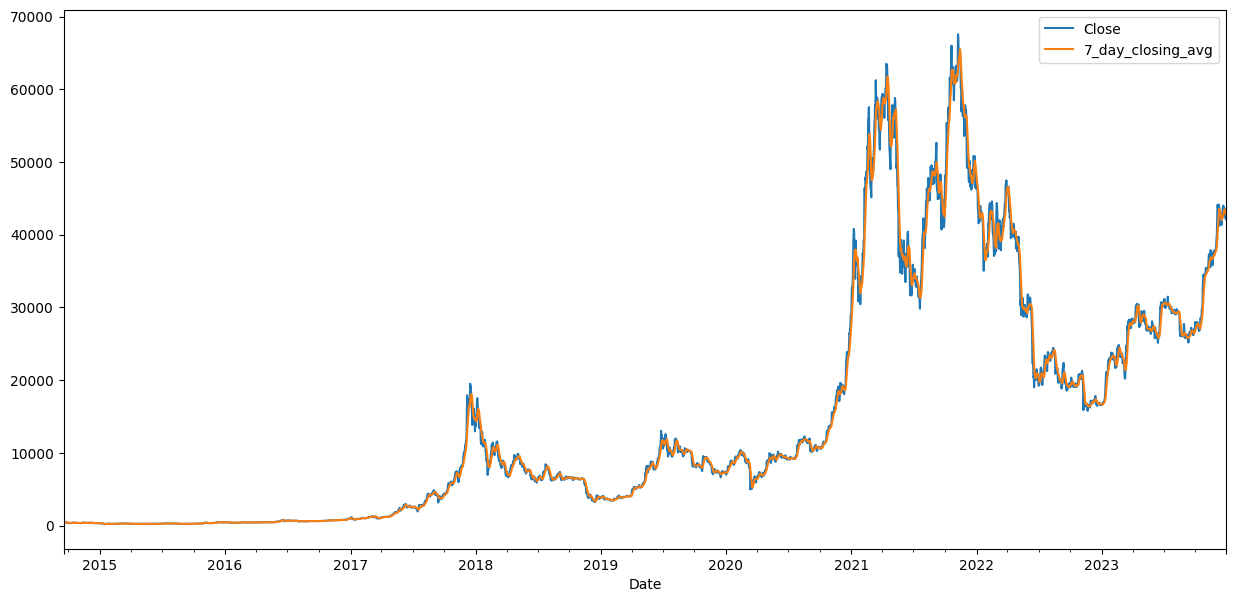

In [8]:
df['7_day_closing_avg'] = df['Close'].rolling(window = 7).mean()
df[['Close', '7_day_closing_avg']].plot(figsize=(15,7))
plt.show()

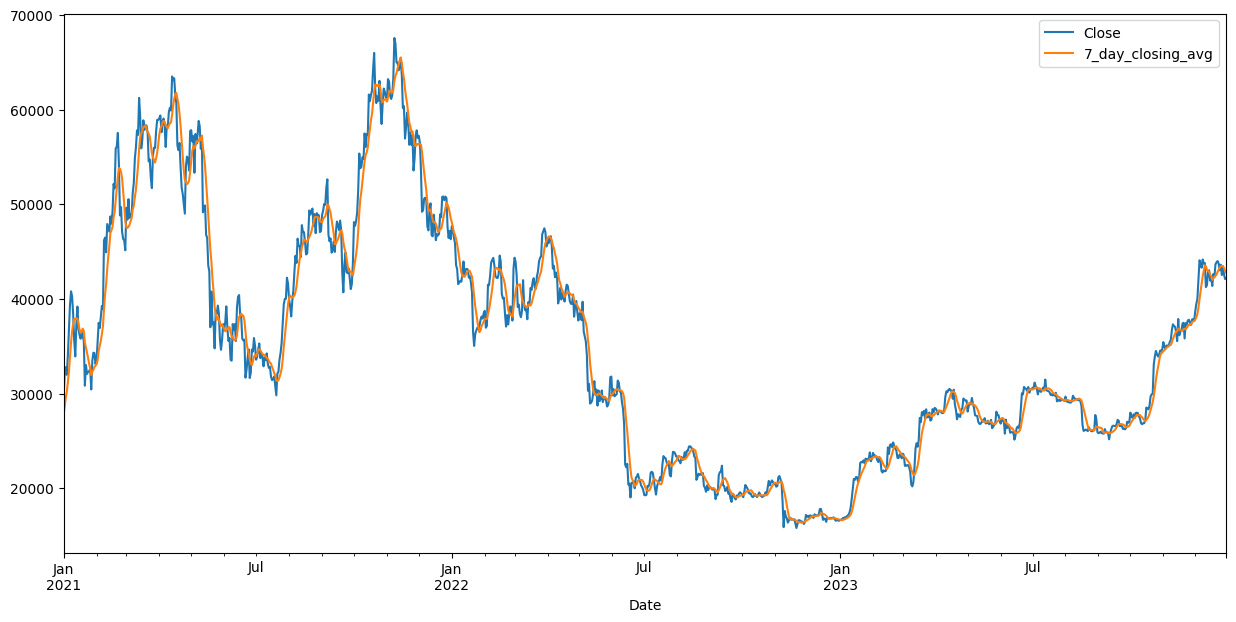

In [9]:
df[['Close', '7_day_closing_avg']].loc['2021':'2023'].plot(figsize=(15,7))
plt.show()

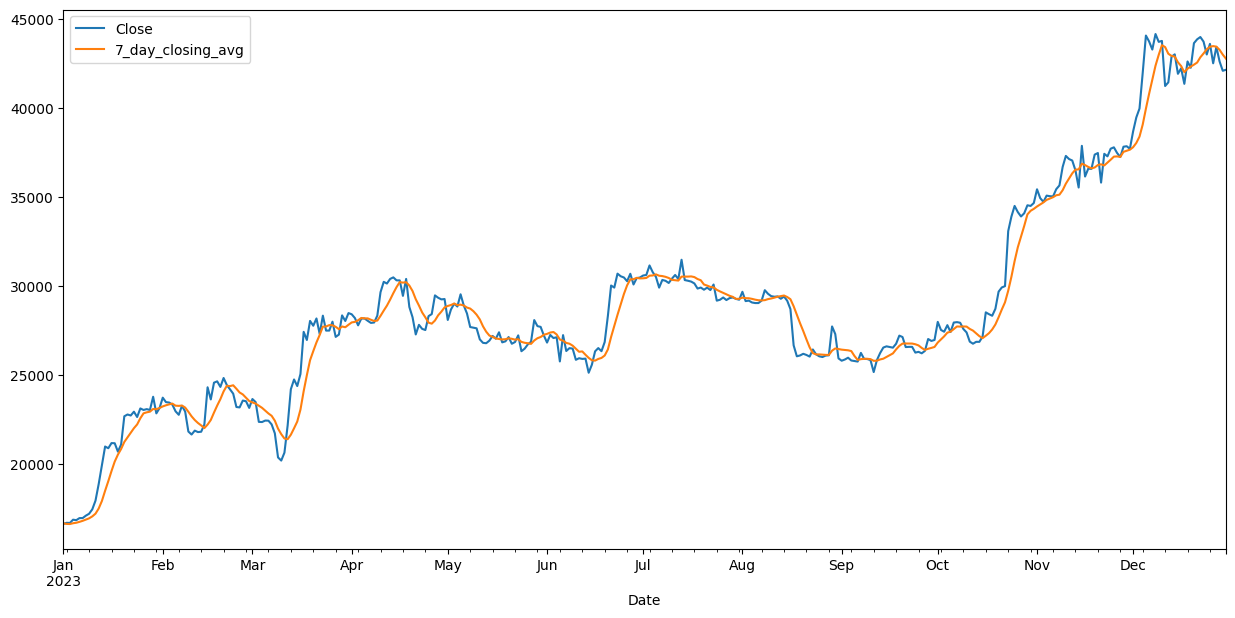

In [10]:
df[['Close', '7_day_closing_avg']].loc['2023'].plot(figsize=(15,7))
plt.show()

In [11]:
df.resample('ME').max()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

In [12]:
df['daily_returns_pct'] = df['Close'].pct_change()*100

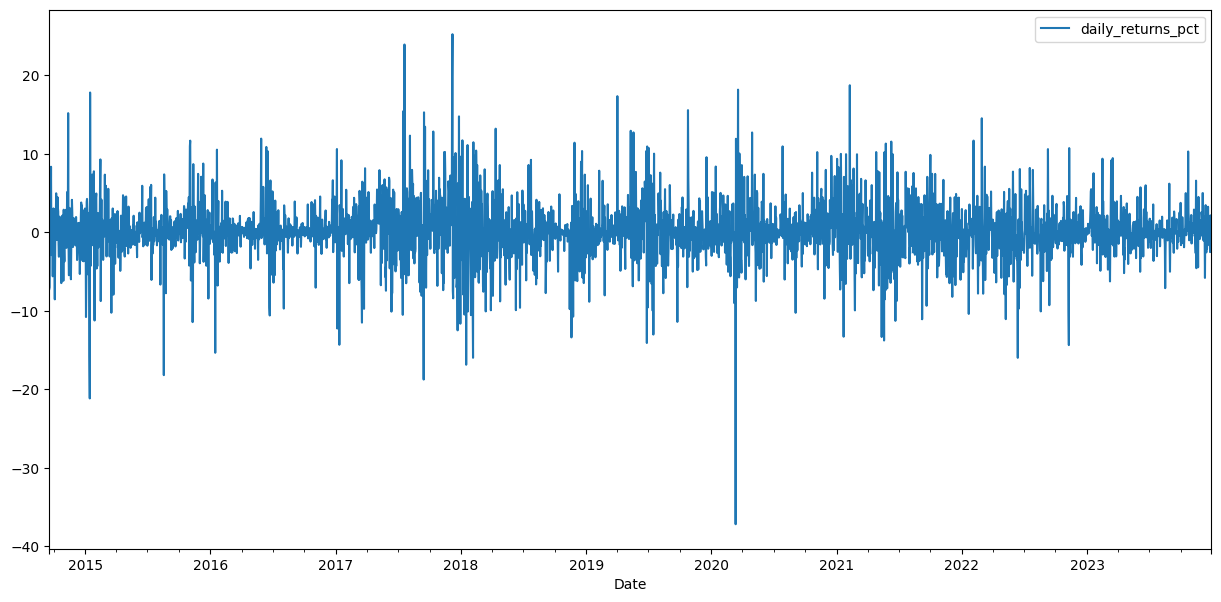

In [13]:
df[['daily_returns_pct']].plot(figsize=(15,7))
plt.show()

<Axes: title={'center': 'Closing Price'}, xlabel='Date'>

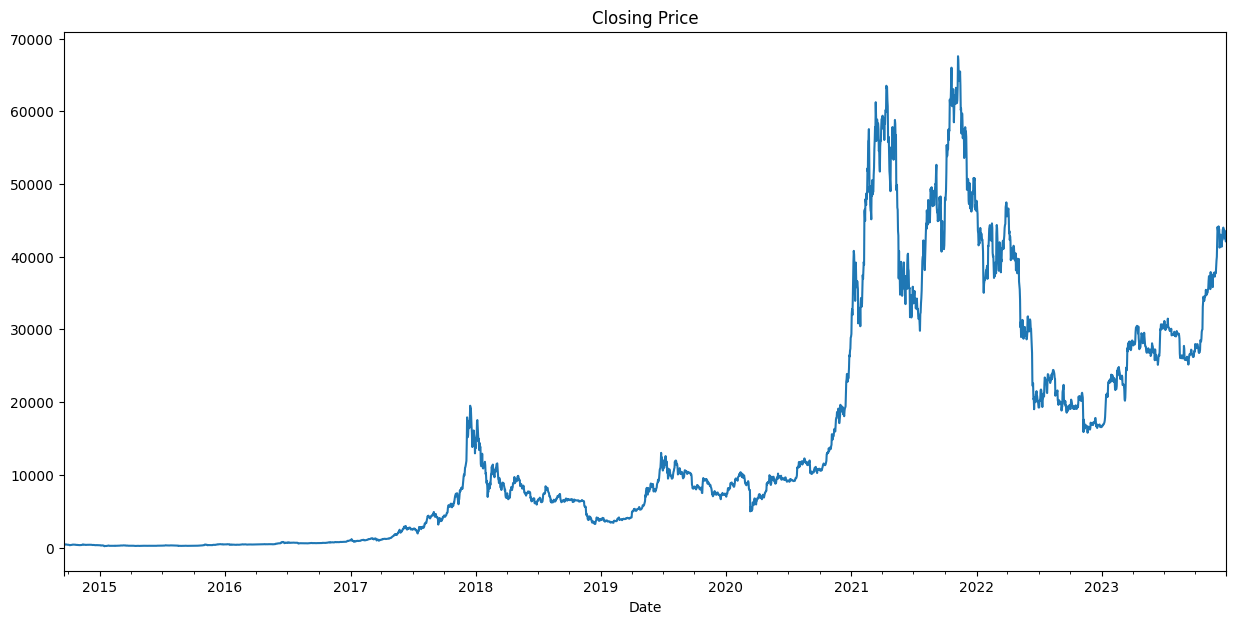

In [14]:
df['Close'].plot(figsize= (15,7), title = 'Closing Price')

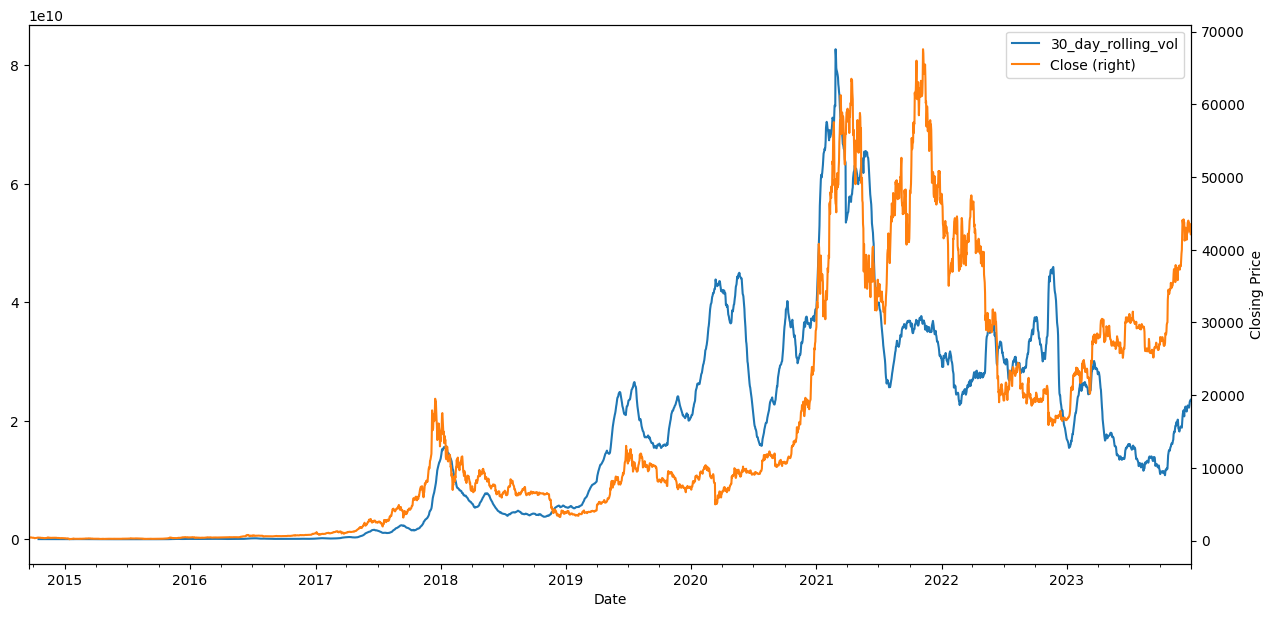

In [15]:
df['30_day_rolling_vol'] = df['Volume'].rolling(window = 30).mean()
df[['30_day_rolling_vol']].plot(figsize= (15,7))
ax = df['Close'].plot(secondary_y= True, legend = True)
ax.set_ylabel("Closing Price")
plt.show()

In [16]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7_day_closing_avg,6
daily_returns_pct,1
30_day_rolling_vol,29


In [17]:
df[df['30_day_rolling_vol'].isnull()]

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_pct,30_day_rolling_vol
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,NaN
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,NaN,0.835210,NaN
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,417.462572,8.364742,NaN
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,412.586997,-2.888081,NaN
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,410.748997,-2.748309,NaN


In [18]:
rolling_mean = df['30_day_rolling_vol'].rolling(window=60, center=True, min_periods=1).mean()
df['30_day_rolling_vol'] = df['30_day_rolling_vol'].fillna(rolling_mean)

In [19]:
rolling_mean = df['daily_returns_pct'].rolling(window=7, center=True, min_periods=1).mean()
df['daily_returns_pct'] = df['daily_returns_pct'].fillna(rolling_mean)

In [20]:
rolling_mean = df['7_day_closing_avg'].rolling(window=30, center=True, min_periods=1).mean()
df['7_day_closing_avg'] = df['7_day_closing_avg'].fillna(rolling_mean)

In [21]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7_day_closing_avg,0
daily_returns_pct,0
30_day_rolling_vol,0


In [22]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

df['is_weekend'] = df['weekday_numeric'].isin([5,6]).astype(int)

In [23]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_pct,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,407.047664,-3.534443,3.624856e+07,2014,9,17,2,Wednesday,2,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,404.946097,-7.192558,3.612429e+07,2014,9,18,3,Thursday,3,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,402.643347,-6.984265,3.582657e+07,2014,9,19,4,Friday,4,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,399.883271,3.573492,3.541100e+07,2014,9,20,5,Saturday,5,1
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,396.925063,-2.465854,3.502537e+07,2014,9,21,6,Sunday,6,1


In [24]:
df['lag'] = df['Close'].shift()
df['lag2'] = df['Close'].shift(2)
df['lag3'] = df['Close'].shift(3)

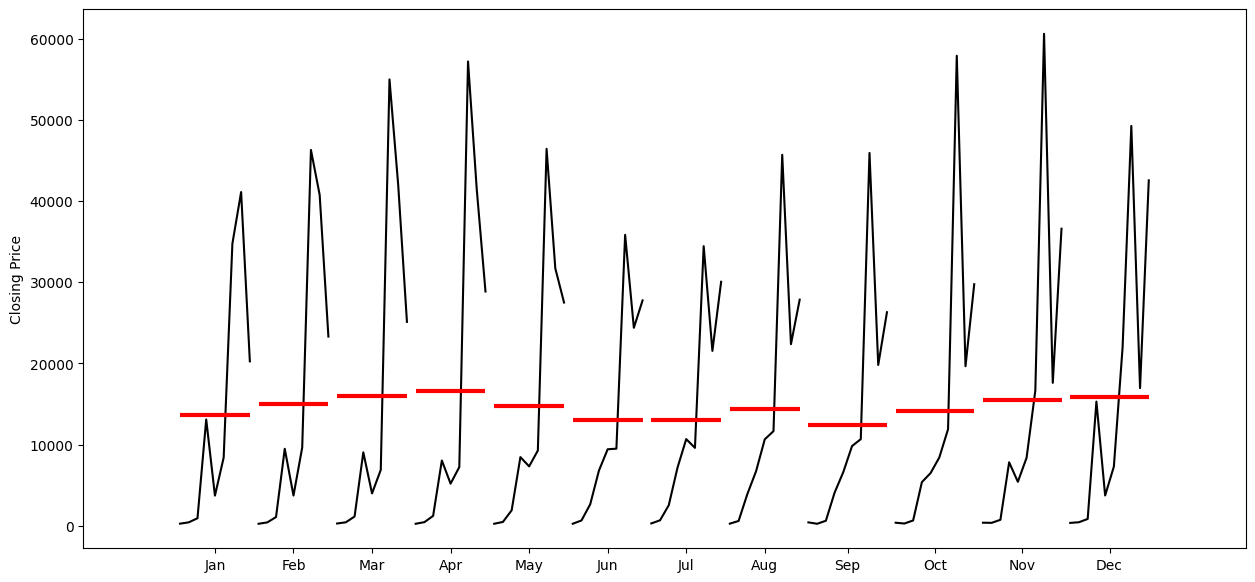

In [44]:
fig = month_plot(
    df['Close'].resample('ME').mean(),
    ylabel='Closing Price'
)

fig.set_size_inches(15, 7)

plt.show()

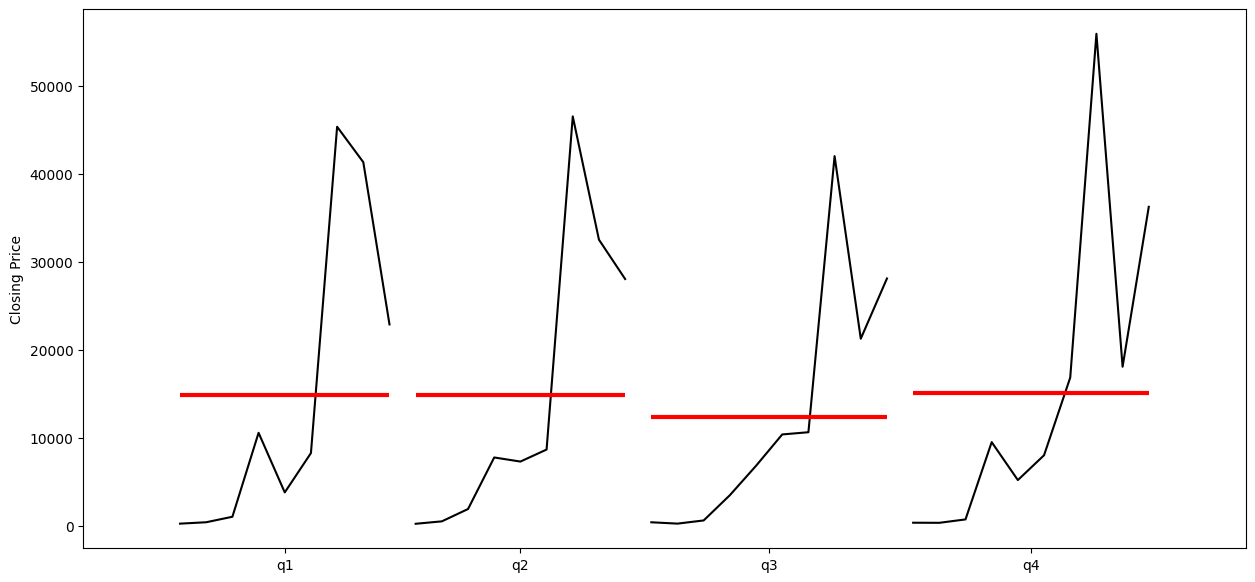

In [45]:
fig = quarter_plot(
    df['Close'].resample('QE').mean(),
    ylabel = 'Closing Price')
fig.set_size_inches(15, 7)
plt.show()

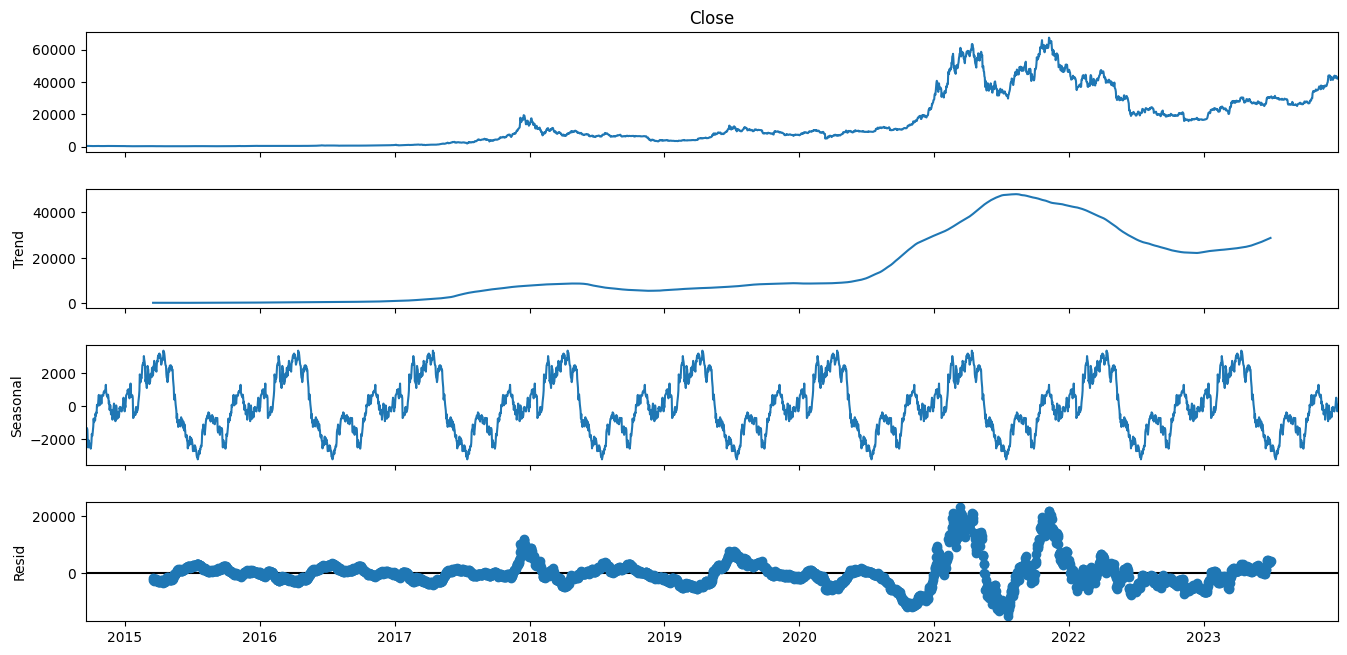

In [55]:
decomposition = seasonal_decompose(
    df['Close'],
    model = 'additive',
    period = 365)
fig = decomposition.plot()
fig.set_size_inches(15,7)
plt.show()